In [1]:
%matplotlib inline

import matplotlib.pyplot as plt #using matplotlib.pyplot for data visualization
import pandas as pd #using pandas to read datafile
import numpy as np
from pandas import Series
from __future__ import division
import glob
import datetime as dt
from os import listdir
import glob
import os
from IPython.display import display

**Discharge**

In [2]:
#Loading in all the discharge files from my pythonfolder.
files1 = list(glob.iglob('**/Daily Discharge/*.txt',recursive=True))
files2 = list(glob.iglob('**/Daily Discharge/*.TXT',recursive=True))
files = files1+files2 #Merging the datasets into one dataset
files.sort()
files = list(set(files))
STNS = {}
discharge = pd.DataFrame()

#Creating a loop to arrange the data
for infile in files:
    with open(infile, 'r') as f:
        meta = f.readlines()[0:5]
        stnid = meta[0].strip().split(':')[1]
        stnid = stnid.strip()
        tmp = meta[1].strip().split()
        tmp.pop(tmp.index('Latitude:'))
        tmp.pop(tmp.index('Location:'))
        latitude = ':'.join(tmp[-3:])
        latitude = latitude.split(':')
        latitude = list(map(int,latitude))
        latitude = (latitude[0]+latitude[1]/60+latitude[2]/3600)
        river = ' '.join(tmp[:-3])
        year = (meta[4].strip().split(':'))[1].strip()
        
    ws = [4,9,7,7,7,7,7,7,7,7,7,7,7]
    
    #Reading the file and setting the header row to the 9th line, and reading only 31 lines after that  
    df = pd.read_fwf(infile,widths=ws,header=9, nrows=31, keep_default_na = False)
    df = df.drop('Day', 1)
    df = np.array(df.T)
    df = df[df != '']
    data = pd.DataFrame([])
    data['Discharge'] = df  
    data = data.apply(pd.to_numeric, errors='coerce')
    
    data = data.set_index(pd.date_range(year, periods=len(data), freq='D'),
                          drop=True, append=False, inplace=False, verify_integrity=False)
    data.name = river
    data.sid = stnid
    data.lat = latitude
    if stnid not in STNS.keys():
        STNS[stnid] = data
    else:
        STNS[stnid] = STNS[stnid].append(data)
        STNS[stnid].name = data.name
    print(data)

            Discharge
2001-01-01       52.2
2001-01-02       49.2
2001-01-03       47.4
2001-01-04       47.4
2001-01-05       46.2
2001-01-06       45.6
2001-01-07       45.0
2001-01-08       44.4
2001-01-09       44.0
2001-01-10       43.8
2001-01-11       43.2
2001-01-12       43.2
2001-01-13       42.8
2001-01-14       43.0
2001-01-15       42.4
2001-01-16       41.6
2001-01-17       41.4
2001-01-18       41.4
2001-01-19       41.4
2001-01-20       41.4
2001-01-21       41.4
2001-01-22       40.4
2001-01-23       40.6
2001-01-24       40.6
2001-01-25       40.6
2001-01-26       40.2
2001-01-27       40.0
2001-01-28       39.8
2001-01-29       40.6
2001-01-30       42.2
...               ...
2001-12-02       56.3
2001-12-03       56.8
2001-12-04       56.8
2001-12-05       56.1
2001-12-06       55.4
2001-12-07       54.7
2001-12-08       54.2
2001-12-09       53.6
2001-12-10       52.2
2001-12-11       51.8
2001-12-12       51.6
2001-12-13       50.0
2001-12-14       50.6
2001-12-15

[366 rows x 1 columns]
            Discharge
2007-01-01        304
2007-01-02        304
2007-01-03        301
2007-01-04        300
2007-01-05        296
2007-01-06        292
2007-01-07        294
2007-01-08        291
2007-01-09        289
2007-01-10        285
2007-01-11        287
2007-01-12        285
2007-01-13        285
2007-01-14        280
2007-01-15        277
2007-01-16        265
2007-01-17        249
2007-01-18        252
2007-01-19        250
2007-01-20        246
2007-01-21        244
2007-01-22        247
2007-01-23        247
2007-01-24        249
2007-01-25        248
2007-01-26        254
2007-01-27        252
2007-01-28        251
2007-01-29        254
2007-01-30        250
...               ...
2007-12-02        550
2007-12-03        548
2007-12-04        535
2007-12-05        537
2007-12-06        513
2007-12-07        498
2007-12-08        502
2007-12-09        495
2007-12-10        492
2007-12-11        492
2007-12-12        483
2007-12-13        468
2007-12-1

[365 rows x 1 columns]
            Discharge
1984-01-01       63.6
1984-01-02       63.6
1984-01-03       63.6
1984-01-04       63.6
1984-01-05       62.2
1984-01-06       60.8
1984-01-07       59.5
1984-01-08       59.5
1984-01-09       58.1
1984-01-10       56.8
1984-01-11       55.4
1984-01-12       55.4
1984-01-13       54.4
1984-01-14       53.3
1984-01-15       52.3
1984-01-16       49.2
1984-01-17       49.2
1984-01-18       52.3
1984-01-19       52.3
1984-01-20       51.2
1984-01-21       51.2
1984-01-22       50.2
1984-01-23       49.2
1984-01-24       49.2
1984-01-25       46.0
1984-01-26       43.0
1984-01-27       40.0
1984-01-28       40.0
1984-01-29       40.0
1984-01-30       39.0
...               ...
1984-12-02       73.4
1984-12-03       70.3
1984-12-04       68.3
1984-12-05       68.3
1984-12-06       67.4
1984-12-07       67.4
1984-12-08       66.4
1984-12-09       66.4
1984-12-10       66.4
1984-12-11       65.5
1984-12-12       65.5
1984-12-13       65.5
1984-12-1

            Discharge
1988-01-01      126.0
1988-01-02      126.0
1988-01-03      128.0
1988-01-04      128.0
1988-01-05      122.0
1988-01-06      121.0
1988-01-07      119.0
1988-01-08      118.0
1988-01-09      118.0
1988-01-10      116.0
1988-01-11      116.0
1988-01-12      116.0
1988-01-13      116.0
1988-01-14      116.0
1988-01-15      116.0
1988-01-16      115.0
1988-01-17      113.0
1988-01-18      110.0
1988-01-19      109.0
1988-01-20      109.0
1988-01-21      109.0
1988-01-22      107.0
1988-01-23      107.0
1988-01-24      104.0
1988-01-25      103.0
1988-01-26      101.0
1988-01-27       99.6
1988-01-28       98.1
1988-01-29       98.1
1988-01-30       96.6
...               ...
1988-12-02      271.0
1988-12-03      269.0
1988-12-04      271.0
1988-12-05      271.0
1988-12-06      274.0
1988-12-07      274.0
1988-12-08      269.0
1988-12-09      269.0
1988-12-10      267.0
1988-12-11      264.0
1988-12-12      262.0
1988-12-13      260.0
1988-12-14      255.0
1988-12-15

[366 rows x 1 columns]
            Discharge
1968-01-01       98.7
1968-01-02       98.7
1968-01-03       97.4
1968-01-04       96.1
1968-01-05       93.7
1968-01-06       92.5
1968-01-07       92.5
1968-01-08       91.3
1968-01-09       91.3
1968-01-10       97.4
1968-01-11      106.0
1968-01-12       93.7
1968-01-13       92.5
1968-01-14       93.7
1968-01-15       96.1
1968-01-16       94.8
1968-01-17       92.5
1968-01-18       91.3
1968-01-19       90.1
1968-01-20       88.9
1968-01-21       87.7
1968-01-22       86.5
1968-01-23       84.1
1968-01-24       84.1
1968-01-25       82.9
1968-01-26       81.9
1968-01-27       80.8
1968-01-28       81.9
1968-01-29       86.5
1968-01-30      100.0
...               ...
1968-12-02      204.0
1968-12-03      202.0
1968-12-04      200.0
1968-12-05      198.0
1968-12-06      194.0
1968-12-07      191.0
1968-12-08      189.0
1968-12-09      187.0
1968-12-10      185.0
1968-12-11      181.0
1968-12-12      179.0
1968-12-13      177.0
1968-12-1

[365 rows x 1 columns]
            Discharge
1978-01-01       54.4
1978-01-02       53.3
1978-01-03       54.4
1978-01-04       53.3
1978-01-05       52.3
1978-01-06       51.2
1978-01-07       50.2
1978-01-08       49.2
1978-01-09       49.2
1978-01-10       49.2
1978-01-11       47.1
1978-01-12       47.1
1978-01-13       48.1
1978-01-14       48.1
1978-01-15       47.1
1978-01-16       46.0
1978-01-17       46.0
1978-01-18       45.0
1978-01-19       44.0
1978-01-20       44.0
1978-01-21       44.0
1978-01-22       46.0
1978-01-23       45.0
1978-01-24       44.0
1978-01-25       43.0
1978-01-26       43.0
1978-01-27       43.0
1978-01-28       42.0
1978-01-29       43.0
1978-01-30       42.0
...               ...
1978-12-02       97.6
1978-12-03       94.3
1978-12-04       94.3
1978-12-05       92.6
1978-12-06       92.6
1978-12-07       92.6
1978-12-08       89.2
1978-12-09       82.7
1978-12-10       81.2
1978-12-11       81.2
1978-12-12       81.2
1978-12-13       81.2
1978-12-1

[365 rows x 1 columns]
            Discharge
1982-01-01        343
1982-01-02        339
1982-01-03        339
1982-01-04        335
1982-01-05        337
1982-01-06        326
1982-01-07        330
1982-01-08        318
1982-01-09        314
1982-01-10        310
1982-01-11        312
1982-01-12        307
1982-01-13        301
1982-01-14        303
1982-01-15        296
1982-01-16        294
1982-01-17        290
1982-01-18        292
1982-01-19        285
1982-01-20        287
1982-01-21        283
1982-01-22        281
1982-01-23        276
1982-01-24        269
1982-01-25        267
1982-01-26        263
1982-01-27        420
1982-01-28        398
1982-01-29        331
1982-01-30        310
...               ...
1982-12-02        445
1982-12-03        439
1982-12-04        436
1982-12-05        427
1982-12-06        424
1982-12-07        410
1982-12-08        407
1982-12-09        408
1982-12-10        402
1982-12-11        400
1982-12-12        394
1982-12-13        386
1982-12-1

[365 rows x 1 columns]
            Discharge
2002-01-01        372
2002-01-02        357
2002-01-03        335
2002-01-04        331
2002-01-05        325
2002-01-06        315
2002-01-07        333
2002-01-08        331
2002-01-09        338
2002-01-10        342
2002-01-11        340
2002-01-12        339
2002-01-13        337
2002-01-14        344
2002-01-15        338
2002-01-16        348
2002-01-17        399
2002-01-18        438
2002-01-19        398
2002-01-20        376
2002-01-21        357
2002-01-22        346
2002-01-23        340
2002-01-24        335
2002-01-25        334
2002-01-26        332
2002-01-27        333
2002-01-28        328
2002-01-29        341
2002-01-30        337
...               ...
2002-12-02        440
2002-12-03        427
2002-12-04        427
2002-12-05        455
2002-12-06        478
2002-12-07        472
2002-12-08        467
2002-12-09        450
2002-12-10        428
2002-12-11        417
2002-12-12        412
2002-12-13        403
2002-12-1

            Discharge
1997-01-01        395
1997-01-02        395
1997-01-03        385
1997-01-04        379
1997-01-05        395
1997-01-06        382
1997-01-07        373
1997-01-08        368
1997-01-09        372
1997-01-10        360
1997-01-11        363
1997-01-12        360
1997-01-13        350
1997-01-14        353
1997-01-15        353
1997-01-16        336
1997-01-17        338
1997-01-18        335
1997-01-19        337
1997-01-20        351
1997-01-21        417
1997-01-22        388
1997-01-23        366
1997-01-24        364
1997-01-25        349
1997-01-26        351
1997-01-27        352
1997-01-28        340
1997-01-29        337
1997-01-30        330
...               ...
1997-12-02        601
1997-12-03        559
1997-12-04        511
1997-12-05        489
1997-12-06        471
1997-12-07        469
1997-12-08        456
1997-12-09        478
1997-12-10       1060
1997-12-11       1460
1997-12-12        860
1997-12-13        683
1997-12-14        810
1997-12-15

[366 rows x 1 columns]
            Discharge
1985-01-01        339
1985-01-02        350
1985-01-03        340
1985-01-04        334
1985-01-05        331
1985-01-06        335
1985-01-07        335
1985-01-08        329
1985-01-09        320
1985-01-10        324
1985-01-11        305
1985-01-12        302
1985-01-13        326
1985-01-14        312
1985-01-15        317
1985-01-16        302
1985-01-17        282
1985-01-18        273
1985-01-19        281
1985-01-20        296
1985-01-21        288
1985-01-22        283
1985-01-23        295
1985-01-24        272
1985-01-25        269
1985-01-26        275
1985-01-27        268
1985-01-28        269
1985-01-29        257
1985-01-30        256
...               ...
1985-12-02        631
1985-12-03        618
1985-12-04        610
1985-12-05        604
1985-12-06        589
1985-12-07        586
1985-12-08        574
1985-12-09        579
1985-12-10        544
1985-12-11        539
1985-12-12        523
1985-12-13        516
1985-12-1

[366 rows x 1 columns]
            Discharge
1998-01-01       50.2
1998-01-02       49.0
1998-01-03       49.0
1998-01-04       48.0
1998-01-05       49.2
1998-01-06       48.4
1998-01-07       49.0
1998-01-08       47.0
1998-01-09       47.8
1998-01-10       46.8
1998-01-11       46.6
1998-01-12       45.8
1998-01-13       45.8
1998-01-14       45.4
1998-01-15       45.0
1998-01-16       44.2
1998-01-17       43.8
1998-01-18       43.4
1998-01-19       43.2
1998-01-20       42.6
1998-01-21       42.0
1998-01-22       41.4
1998-01-23       41.0
1998-01-24       41.2
1998-01-25       41.4
1998-01-26       41.8
1998-01-27       40.8
1998-01-28       41.4
1998-01-29       42.6
1998-01-30       41.2
...               ...
1998-12-02       58.4
1998-12-03       57.5
1998-12-04       57.3
1998-12-05       58.4
1998-12-06       57.5
1998-12-07       57.0
1998-12-08       58.2
1998-12-09       57.0
1998-12-10       56.8
1998-12-11       54.5
1998-12-12       55.0
1998-12-13       52.2
1998-12-1

            Discharge
1984-01-01        380
1984-01-02        376
1984-01-03        366
1984-01-04        357
1984-01-05        354
1984-01-06        349
1984-01-07        335
1984-01-08        333
1984-01-09        329
1984-01-10        324
1984-01-11        323
1984-01-12        316
1984-01-13        314
1984-01-14        320
1984-01-15        302
1984-01-16        305
1984-01-17        373
1984-01-18        346
1984-01-19        328
1984-01-20        315
1984-01-21        290
1984-01-22        296
1984-01-23        287
1984-01-24        290
1984-01-25        281
1984-01-26        281
1984-01-27        269
1984-01-28        269
1984-01-29        274
1984-01-30        255
...               ...
1984-12-02        494
1984-12-03        484
1984-12-04        480
1984-12-05        472
1984-12-06        477
1984-12-07        472
1984-12-08        459
1984-12-09        455
1984-12-10        445
1984-12-11        444
1984-12-12        433
1984-12-13        436
1984-12-14        445
1984-12-15

[365 rows x 1 columns]
            Discharge
1994-01-01        385
1994-01-02        381
1994-01-03        389
1994-01-04        382
1994-01-05        374
1994-01-06        357
1994-01-07        389
1994-01-08        367
1994-01-09        365
1994-01-10        365
1994-01-11        357
1994-01-12        344
1994-01-13        360
1994-01-14        354
1994-01-15        350
1994-01-16        402
1994-01-17        427
1994-01-18        392
1994-01-19        364
1994-01-20        374
1994-01-21        356
1994-01-22        346
1994-01-23        332
1994-01-24        350
1994-01-25        344
1994-01-26        340
1994-01-27        345
1994-01-28        348
1994-01-29        337
1994-01-30        332
...               ...
1994-12-02        473
1994-12-03        468
1994-12-04        465
1994-12-05        452
1994-12-06        428
1994-12-07        436
1994-12-08        433
1994-12-09        428
1994-12-10        420
1994-12-11        414
1994-12-12        407
1994-12-13        398
1994-12-1

[366 rows x 1 columns]
            Discharge
2010-01-01        364
2010-01-02        344
2010-01-03        328
2010-01-04        337
2010-01-05        351
2010-01-06        333
2010-01-07        336
2010-01-08        329
2010-01-09        331
2010-01-10        301
2010-01-11        316
2010-01-12        308
2010-01-13        301
2010-01-14        299
2010-01-15        315
2010-01-16        307
2010-01-17        307
2010-01-18        295
2010-01-19        311
2010-01-20        292
2010-01-21        282
2010-01-22        311
2010-01-23        288
2010-01-24        270
2010-01-25        292
2010-01-26        260
2010-01-27        268
2010-01-28        273
2010-01-29        242
2010-01-30        254
...               ...
2010-12-02        492
2010-12-03        478
2010-12-04        450
2010-12-05        462
2010-12-06        462
2010-12-07        455
2010-12-08        445
2010-12-09        450
2010-12-10        427
2010-12-11        437
2010-12-12        430
2010-12-13        410
2010-12-1

            Discharge
1985-01-01       57.3
1985-01-02       57.3
1985-01-03       55.6
1985-01-04       55.6
1985-01-05       55.6
1985-01-06       55.6
1985-01-07       54.8
1985-01-08       54.8
1985-01-09       53.9
1985-01-10       53.1
1985-01-11       53.1
1985-01-12       53.1
1985-01-13       52.2
1985-01-14       52.2
1985-01-15       52.2
1985-01-16       52.2
1985-01-17       52.2
1985-01-18       51.4
1985-01-19       52.2
1985-01-20       51.4
1985-01-21       51.4
1985-01-22       51.4
1985-01-23       51.4
1985-01-24       51.4
1985-01-25       49.7
1985-01-26       49.7
1985-01-27       49.7
1985-01-28       49.0
1985-01-29       49.0
1985-01-30       49.0
...               ...
1985-12-02       74.9
1985-12-03       74.9
1985-12-04       74.9
1985-12-05       73.3
1985-12-06       74.9
1985-12-07       74.9
1985-12-08       73.3
1985-12-09       73.3
1985-12-10       73.3
1985-12-11       73.3
1985-12-12       73.3
1985-12-13       71.6
1985-12-14       73.3
1985-12-15

            Discharge
1968-01-01        397
1968-01-02        384
1968-01-03        384
1968-01-04        379
1968-01-05        379
1968-01-06        375
1968-01-07        375
1968-01-08        406
1968-01-09        384
1968-01-10        371
1968-01-11        375
1968-01-12        388
1968-01-13        371
1968-01-14        362
1968-01-15        388
1968-01-16        371
1968-01-17        357
1968-01-18        349
1968-01-19        345
1968-01-20        345
1968-01-21        341
1968-01-22        333
1968-01-23        333
1968-01-24        328
1968-01-25        324
1968-01-26        316
1968-01-27        312
1968-01-28        316
1968-01-29        345
1968-01-30        379
...               ...
1968-12-02        702
1968-12-03        691
1968-12-04        685
1968-12-05        673
1968-12-06        662
1968-12-07        650
1968-12-08        639
1968-12-09        633
1968-12-10        628
1968-12-11        622
1968-12-12        616
1968-12-13        611
1968-12-14        600
1968-12-15

            Discharge
1972-01-01      116.0
1972-01-02      116.0
1972-01-03      114.0
1972-01-04      113.0
1972-01-05      113.0
1972-01-06      111.0
1972-01-07      110.0
1972-01-08      108.0
1972-01-09      105.0
1972-01-10      105.0
1972-01-11      104.0
1972-01-12      104.0
1972-01-13      102.0
1972-01-14      101.0
1972-01-15      101.0
1972-01-16       99.3
1972-01-17       97.9
1972-01-18       95.1
1972-01-19       92.4
1972-01-20       92.4
1972-01-21       91.1
1972-01-22       91.1
1972-01-23       91.1
1972-01-24       89.8
1972-01-25       88.4
1972-01-26       87.1
1972-01-27       87.1
1972-01-28       85.8
1972-01-29       87.1
1972-01-30       91.1
...               ...
1972-12-02      155.0
1972-12-03      153.0
1972-12-04      152.0
1972-12-05      152.0
1972-12-06      152.0
1972-12-07      150.0
1972-12-08      148.0
1972-12-09      148.0
1972-12-10      145.0
1972-12-11      143.0
1972-12-12      141.0
1972-12-13      138.0
1972-12-14      138.0
1972-12-15

            Discharge
1981-01-01       54.4
1981-01-02       55.4
1981-01-03       54.4
1981-01-04       54.4
1981-01-05       53.3
1981-01-06       53.3
1981-01-07       53.3
1981-01-08       52.3
1981-01-09       50.2
1981-01-10       49.2
1981-01-11       49.2
1981-01-12       49.2
1981-01-13       49.2
1981-01-14       48.1
1981-01-15       47.1
1981-01-16       47.1
1981-01-17       47.1
1981-01-18       47.1
1981-01-19       48.1
1981-01-20       46.0
1981-01-21       46.0
1981-01-22       46.0
1981-01-23       44.0
1981-01-24       44.0
1981-01-25       46.0
1981-01-26       46.0
1981-01-27       44.0
1981-01-28       44.0
1981-01-29       44.0
1981-01-30       46.0
...               ...
1981-12-02       72.0
1981-12-03       69.0
1981-12-04       70.5
1981-12-05       69.0
1981-12-06       69.0
1981-12-07       69.0
1981-12-08       67.6
1981-12-09       67.6
1981-12-10       66.3
1981-12-11       66.3
1981-12-12       64.9
1981-12-13       64.9
1981-12-14       63.6
1981-12-15

[366 rows x 1 columns]
            Discharge
1998-01-01        453
1998-01-02        438
1998-01-03        421
1998-01-04        413
1998-01-05        408
1998-01-06        376
1998-01-07        415
1998-01-08        419
1998-01-09        395
1998-01-10        406
1998-01-11        393
1998-01-12        368
1998-01-13        382
1998-01-14        364
1998-01-15        366
1998-01-16        374
1998-01-17        362
1998-01-18        354
1998-01-19        346
1998-01-20        341
1998-01-21        327
1998-01-22        337
1998-01-23        331
1998-01-24        330
1998-01-25        328
1998-01-26        331
1998-01-27        330
1998-01-28        328
1998-01-29        325
1998-01-30        333
...               ...
1998-12-02        663
1998-12-03        657
1998-12-04        655
1998-12-05        653
1998-12-06        645
1998-12-07        629
1998-12-08        608
1998-12-09        603
1998-12-10        601
1998-12-11        595
1998-12-12        595
1998-12-13        580
1998-12-1

In [3]:
STNS.keys() #Checking if my keys are correct

dict_keys(['447', '430', '450', '420', '445'])

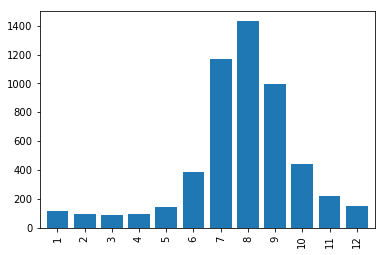

In [4]:
stn420=STNS['420'].groupby(STNS['420'].index.month).mean()
stn420.plot(kind='bar',width=0.8,legend=False)

,Discharge
1979-01-01,15.2
1979-01-02,14.8
1979-01-03,14.8
1979-01-04,14.8
1979-01-05,14.8
1979-01-06,14.4
1979-01-07,14.4
1979-01-08,14.4
1979-01-09,14.0
1979-01-10,14.0


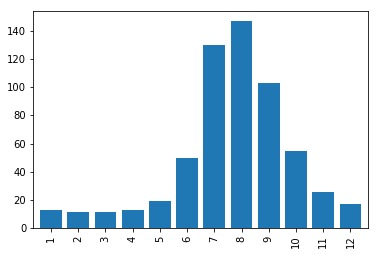

In [5]:
stn430=STNS['430'].groupby(STNS['430'].index.month).mean()
stn430.plot(kind='bar',width=0.8,legend=False)

display(STNS['430'])

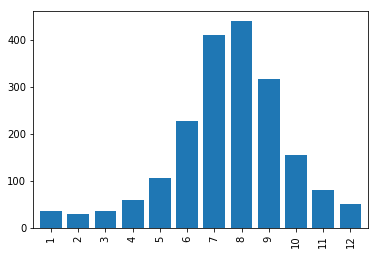

In [6]:
stn445=STNS['445'].groupby(STNS['445'].index.month).mean()
stn445.plot(kind='bar',width=0.8,legend=False)

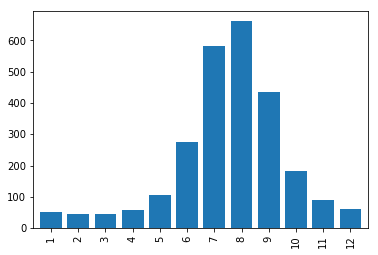

In [7]:
stn447=STNS['447'].groupby(STNS['447'].index.month).mean()
stn447.plot(kind='bar',width=0.8,legend=False)

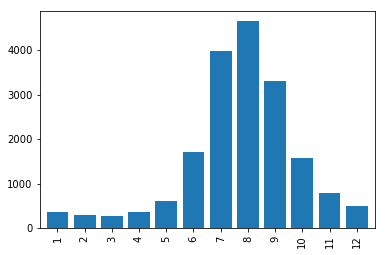

In [8]:
stn450=STNS['450'].groupby(STNS['450'].index.month).mean()
stn450.plot(kind='bar',width=0.8,legend=False)

In [13]:
for i in STNS.keys():
    stns = STNS[i]
    stns['date'] = stns.index
    stns = stns.sort_values(by='date')
    stns.to_csv('Datasets\discharge_{0}.csv'.format(STNS[i].name), index=False,na_rep = -99.9)

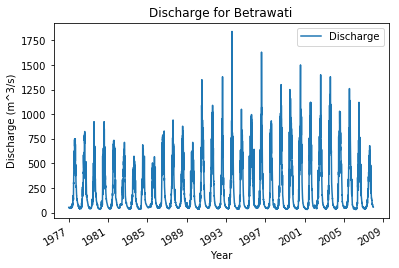

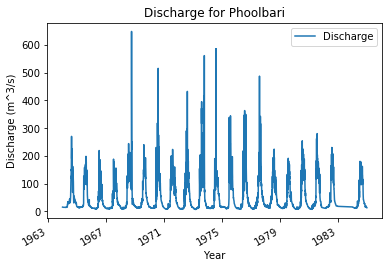

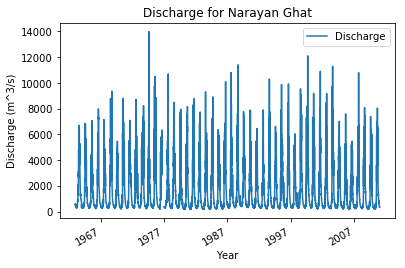

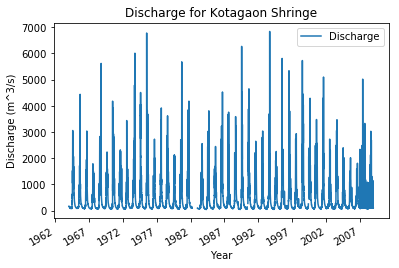

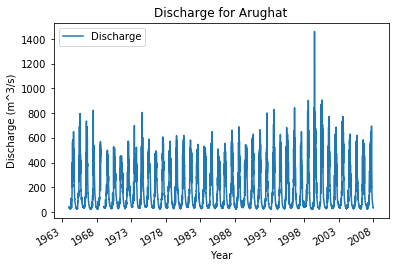

In [10]:
#Plotting the discharge for every station
for i in STNS.keys():
    STNS[i].plot()
    plt.title('Discharge for {0}'.format(STNS[i].name))
    plt.ylabel('Discharge (m^3/s)')
    plt.xlabel('Year')

In [11]:
files = list(glob.iglob('**/TA*',recursive=True))
files.sort()
STNS_temp = {}
for f in files:
    fold, stn_id, info = f.split('/')
    print (fold, stn_id, info)

ValueError: not enough values to unpack (expected 3, got 1)

##### Temperature data

In [ ]:

def date_parser(doy, year):    
    return dt.datetime.strptime(doy.zfill(3)+year, '%j%Y')
    
files = list(glob.iglob('**/TA*',recursive=True))
files.sort()
STNS_temp = {}
for f in files:
    fold, stn_id, info = f.split('/')
    year = "".join(info[-5:].split('.'))
    with open(f) as fo:
        info = fo.readline().split()
        try:
            yr, var, stn_name = info[0], info[1].lower(), info[3].lower()
            
        except:
            yr = year
            stn_name = stn_id
                          
        data = fo.readlines()[:-1]
        data = [d.strip() for d in data]
        data = '\n'.join(data)
        with open('data.dump', 'w') as dump:
            dump.write(data)
                   
    parser = lambda date: date_parser(date, year=year)
    df = pd.read_table('data.dump', delim_whitespace=True, skiprows=1, names=['date', 'Tmax','Tmin'],
                       na_values= 'DNA', parse_dates=[0], date_parser=parser, index_col='date' )

    df['avg_T'] = df.mean(axis =1) # calculating average temp
    df = df.drop(['Tmax','Tmin'], axis=1) # removing tmin and tmax from dataframe   
    df.name = stn_name
    df.sid = stn_id
    df.columns = [stn_id]
    
    if stn_id not in STNS_temp.keys():
        STNS_temp[stn_id] = df
    else:
        STNS_temp[stn_id] = STNS_temp[stn_id].append(df)
        STNS_temp[stn_id].name = df.name
        STNS_temp[stn_id].sid = df.sid

In [ ]:
STNS_temp.keys() #Checking so my keys are correct

In [ ]:
for i in STNS_temp.keys():
    STNS_temp[i].plot()
    plt.title('Average temperature for {0}'.format(STNS_temp[i].name))
    plt.ylabel('Temperatur in degree Celsius')

##### Precipitation data

In [ ]:

Files = list(glob.iglob('**/AS*',recursive=True))
Files.sort()
STNS_pre = {}

for f in Files:   
    fds, stn_id, info = f.split('/')
    year = "".join(info[-5:].split('.'))     
    ws = [7,10]
    df = pd.read_fwf(f,widths=ws, header=None,names =['day','prec'],nrows=366,keep_default_na = True).drop('day',1)
    df = df.dropna(subset = ['prec'])
    data = df.apply(pd.to_numeric, errors='coerce') 
    data = data.set_index(pd.date_range(year, periods=len(data), freq='D'))
    all_data = pd.DataFrame(data)
    all_data[all_data < 0] = np.nan
    
    all_data.name = stn_id
    all_data.sid = stn_id  

    if stn_id not in STNS_pre.keys():
        STNS_pre[stn_id] = all_data
    else:
        STNS_pre[stn_id] = STNS_pre[stn_id].append(all_data)
        STNS_pre[stn_id].name = all_data.name
        STNS_pre[stn_id].sid = all_data.sid

In [ ]:
STNS_pre.keys() #checking my keys

In [ ]:
for i in STNS_pre.keys():
    STNS_pre[i].plot()
    plt.title('Precipitation for {0}'.format(STNS_pre[i].name))
    plt.xlabel('Year')
    plt.ylabel('Precipitation (mm)')